Номер 2.2
Для примера 1.4 (см. Лекцию 1) написать программу, реализующую для различных параметров n, a, b, p моделирование случайного вектора X, наблюдения Y и оптимальной оценки 𝐸[𝑋|𝑌]. По выборке объемом N= 10 000 (построить график выборки на оси для визуального контроля) вычислить выборочное среднее ошибки оценки 𝐸[𝑋|𝑌] (контролировать его малость) и выборочную ковариационную матрицу ее ошибки. Исследовать поведение данной ковариационной матрицы при варьировании параметров a, b, p: одинаковые/разные компоненты вектора a, одинаковые/разные компоненты вектора b, большие/малые компоненты вектора a, большие/малые компоненты вектора b.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Генерируем X:

In [ ]:
def X(n, p, N):
    rng = np.random.default_rng() # инициализирует новый генератор
    x = np.arange(n)
    id = rng.choice(x, size=N, p=p)
    X = np.zeros([n, N])
    X[id, np.arange(N)] = 1
    return X

Генерируем Y:

In [ ]:
def Y(n, a, b, p, N):
    a = np.reshape(a, [1, -1])
    b = np.reshape(b, [1, -1])
    x = X(n, p, N)
    v = np.random.normal(size=N)
    Y = a @ x + b @ x @ v
    return x, Y

Вспомогательная функция:

In [ ]:
def n_dens(x, mu=0.0, sigma=1.0):
    e = -((x - mu) ** 2) / (2. * (sigma ** 2))
    return (1. / (2 * np.pi * (sigma ** 2))) * e

In [ ]:
def EXY(n, a, b, p, N):
    a = np.reshape(a, [-1, 1])
    b = np.reshape(b, [-1, 1])
    x, y = Y(n, a, b, p, N)
    p = np.reshape(p, [-1, 1])
    
    re_y = (y - a) / b
    dens_y = n_dens(re_y)
    
    value = (p / b) * dens_y
    results = value / np.sum(value, axis=0)
    
    return x, results

In [ ]:
n = 15
p = np.random.sample(n)
p /= sum(p)
N = 10000

In [ ]:
# маленькие a b
a1 = np.random.uniform(size=[n, 1]) * 10
b1 = np.random.uniform(size=[n, 1]) * 10
# маленькие и одинаковые a b
a2 = np.ones(n) * np.random.uniform(size=[1]) * 10
b2 = np.ones(n) * np.random.uniform(size=[1]) * 10
# большие a и b
a3 = np.random.uniform(size=[n, 1]) * 1e5
b3 = np.random.uniform(size=[n, 1]) * 1e5

a4 = np.random.uniform(size=[n, 1]) * 1e-1
b4 = np.random.uniform(size=[n, 1]) * 1e-1

Вывод некоторых из параметров:

In [ ]:
a1

array([[9.03486619],
       [1.79580034],
       [6.79349792],
       [9.87651389],
       [7.91795608],
       [6.6218604 ],
       [8.45834369],
       [7.25859141],
       [5.58663419],
       [4.55592301],
       [7.15464615],
       [2.45275001],
       [3.41949746],
       [6.58671044],
       [5.21414077]])

In [ ]:
b1

array([[4.7048025 ],
       [0.25358176],
       [2.25273068],
       [1.02407627],
       [7.91423057],
       [3.29002303],
       [4.45150865],
       [7.26687775],
       [6.21098722],
       [3.13310709],
       [7.07984789],
       [6.1709654 ],
       [3.19653347],
       [4.57683208],
       [6.29930445]])

In [ ]:
a2

array([8.14959722, 8.14959722, 8.14959722, 8.14959722, 8.14959722,
       8.14959722, 8.14959722, 8.14959722, 8.14959722, 8.14959722,
       8.14959722, 8.14959722, 8.14959722, 8.14959722, 8.14959722])

In [ ]:
b2

array([4.82754681, 4.82754681, 4.82754681, 4.82754681, 4.82754681,
       4.82754681, 4.82754681, 4.82754681, 4.82754681, 4.82754681,
       4.82754681, 4.82754681, 4.82754681, 4.82754681, 4.82754681])

In [ ]:
mas_a = [a1, a2, a3, a4]
mas_b = [b1, b2, b3, b4]

In [ ]:
x_and_res = []
for i in range(len(mas_a)):
  x_and_res.append(EXY(n, mas_a[i], mas_b[i], p, N))

In [ ]:
x_and_res.append(EXY(n, a1, b2, p, N))
x_and_res.append(EXY(n, a2, b1, p, N))
x_and_res.append(EXY(n, a3, b4, p, N))
x_and_res.append(EXY(n, a4, b3, p, N))

Выборочные средние получились следующие для случаев:
1.   a1 b1
2.   a2 b2
3.   a3 b3
4.   a4 b4
5.   a1 b2
6.   a2 b1
7.   a3 b4
8.   a4 b3

In [ ]:
c = 0
for i in x_and_res:
  c += 1
  print("случай", c)
  print((1. / N)*np.sum(i[1] - i[0], axis=1))

случай 1
[-0.03516278  0.90024884 -0.01591886 -0.07235227 -0.05448564 -0.06685253
 -0.01857124 -0.09716524 -0.11003009 -0.07498799 -0.08056971 -0.04216674
 -0.04425668 -0.06630446 -0.1214246 ]
случай 2
[ 1.35476817e-03 -2.07984002e-03  2.13473456e-03 -2.41647585e-03
 -7.84827247e-04  3.55311423e-03 -2.55805142e-04 -1.98837461e-03
 -3.55053694e-03 -2.01181255e-03 -4.79975868e-06  4.04402875e-04
 -4.07257996e-04  6.64851360e-04  5.38785892e-03]
случай 3
[-0.0343026  -0.07943332 -0.01441206  0.23697017 -0.04958469 -0.05964583
  0.59911346 -0.08499857 -0.10834105 -0.08027031 -0.07931268 -0.04145494
 -0.04196634 -0.04394581 -0.11841542]
случай 4
[-0.03529225 -0.08225303 -0.01589757 -0.08249868 -0.05932522 -0.06004306
 -0.01944994 -0.10187964 -0.10762803 -0.0768485   0.9190488  -0.04419417
 -0.04679479 -0.06485931 -0.12208461]
случай 5
[ 0.00252062  0.00015962 -0.00010615 -0.00213602 -0.00014609 -0.00098242
 -0.00132648 -0.00271578 -0.00179827 -0.00092411  0.00128093  0.00252904
 -0.00229842

In [ ]:
import seaborn as sns
import pylab
from tqdm import tqdm

100%|██████████| 8/8 [00:05<00:00,  1.38it/s]


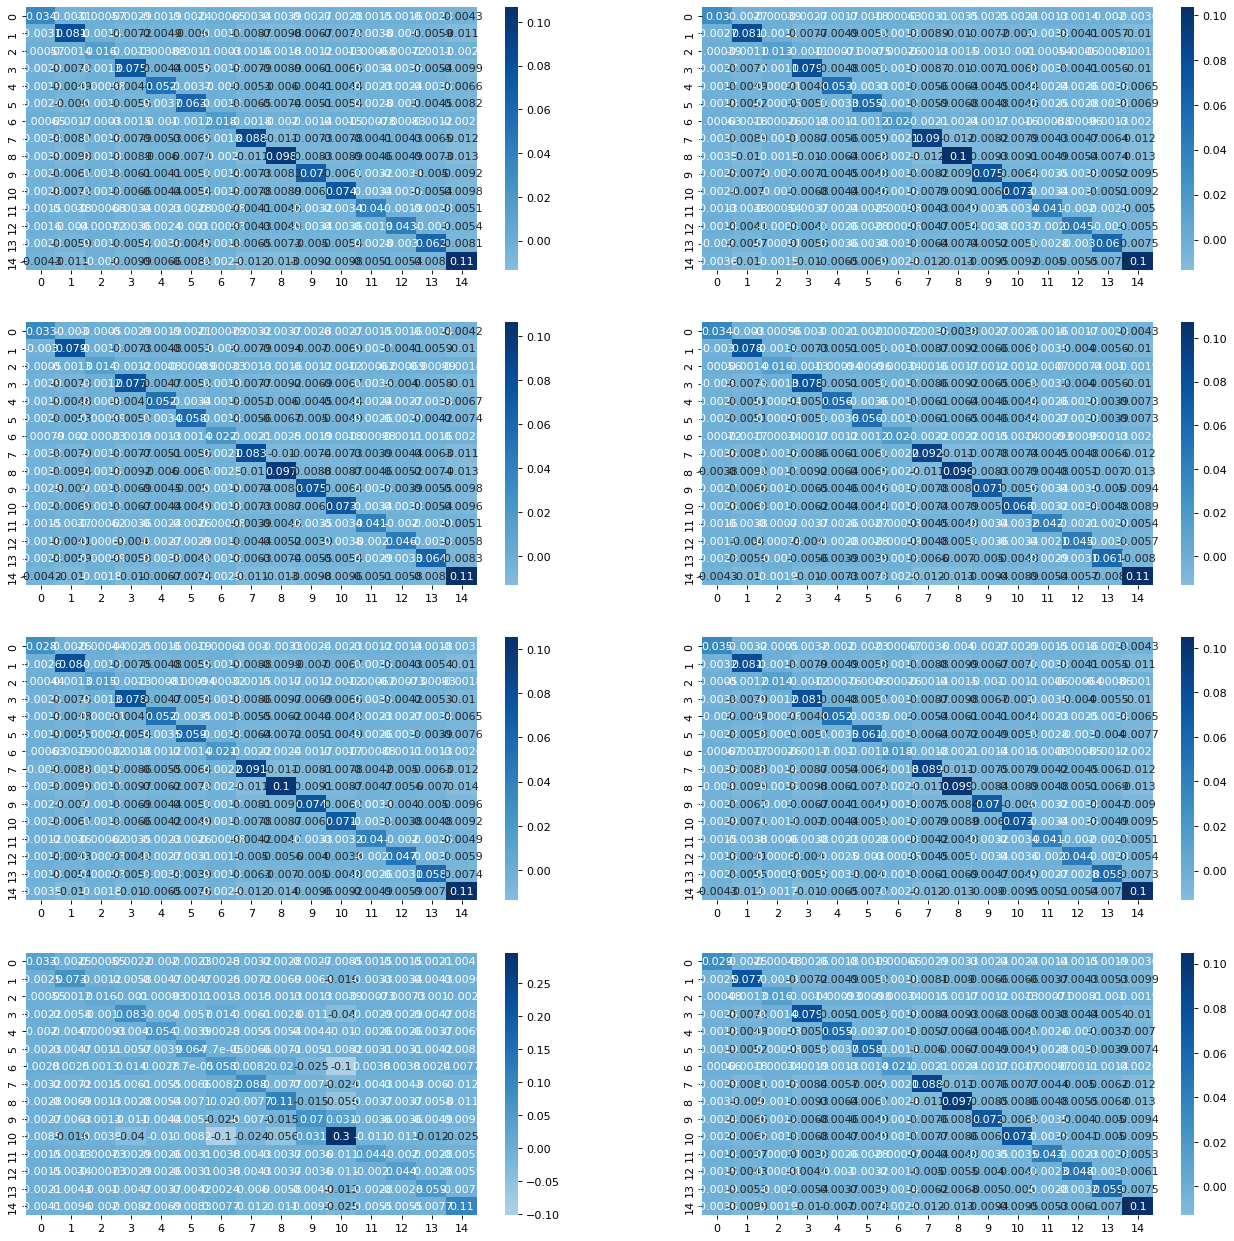

In [ ]:
plt.figure(figsize=(20,20), dpi=80)
for i in tqdm(range(8)):
  pylab.subplot(4, 2, i+1)
  sns.heatmap(np.cov(x_and_res[i][1] - x_and_res[i][0]), cmap='Blues', center=0, annot=True)

Номер 2.3
На отрезке времени [0,1] смоделировать 10 траекторий стандартного винеров-ского процесса. Вывести эти траектории на одном графике (шаг дискретизации по времени 0,001). Для моделирования использовать:

А) Свойство 6) винеровского процесса, ограничив бесконечный ряд числом 1000.

Б) Свойство независимости приращений винеровского процесса.

Для одной траектории винеровского процесса, моделируемой с помощью свойства 6) выве-сти на общий график аппроксимации, полученные с помощью конечного ряда порядка 5, 10, 50, 100, 500, 1000.

Смоделировать одну траекторию стандартного винеровского процесса на [0,1] с помощью свойства 17). Используя двоичное разбиение отрезка построить приближения одной и той же траектории процесса (ломаные линии) для 24, 26, 28 и 210 точек.

Пункт Б. Свойство независимости приращений винеровского процесса.

Функция, создающая процесс по свойству независимости:

In [ ]:
def w_processB(n_step = 1000, w_count = 5, scale = 0.001):
  w = [np.zeros(w_count)]
  for i in range(n_step):
    w.append(w[i] + np.random.normal(loc = 0.0, scale = np.sqrt(scale), size = w_count))
  w = np.array(w).T
  return w

Нарисуем графики 5 траекторий

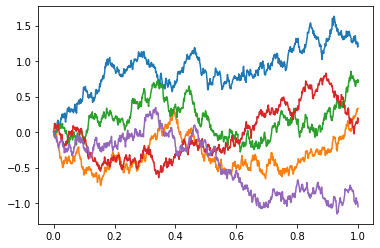

In [ ]:
w = w_processB()
for i in w:
  plt.plot(np.linspace(0, 1, 1001),i)
plt.show()

Номер 2.4. На отрезке времени [0,1] для стандартного винеровского процесса численно проверить выполнение свойства 13), выбирая n=10, 20, 30.

In [ ]:
def property13check(n = 10):
  m_list = []
  m_list.append(0)
  for i in range(n+1):
    m_list.append(2**i)
  print(m_list)
  t_n_m_list = []
  for i in m_list:
    t_n_m_list.append(i / (2**n))
  print(t_n_m_list)
  w = w_processB(1000, 1, 0.001)
  plt.plot(w[0])
  plt.show()

  S_n = 0
  for i in range(1, len(w[0])):
    S_n = S_n + (w[0][i] - w[0][i-1])**2
  print("Значение S_n при данном n получилось:", S_n)

[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
[0.0, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0]


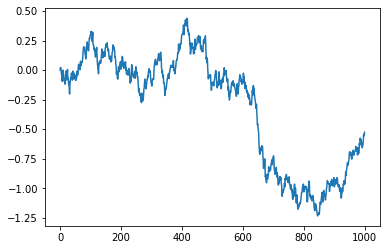

Значение S_n при данном n получилось: 1.0019020839178987


In [ ]:
property13check()

[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]
[0.0, 9.5367431640625e-07, 1.9073486328125e-06, 3.814697265625e-06, 7.62939453125e-06, 1.52587890625e-05, 3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0]


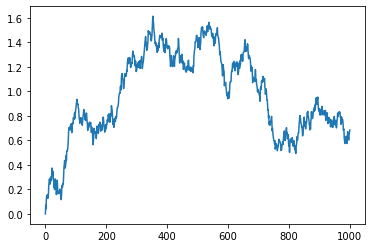

Значение S_n при данном n получилось: 0.9960889599829795


In [ ]:
property13check(20)

[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824]
[0.0, 9.313225746154785e-10, 1.862645149230957e-09, 3.725290298461914e-09, 7.450580596923828e-09, 1.4901161193847656e-08, 2.9802322387695312e-08, 5.960464477539063e-08, 1.1920928955078125e-07, 2.384185791015625e-07, 4.76837158203125e-07, 9.5367431640625e-07, 1.9073486328125e-06, 3.814697265625e-06, 7.62939453125e-06, 1.52587890625e-05, 3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0]


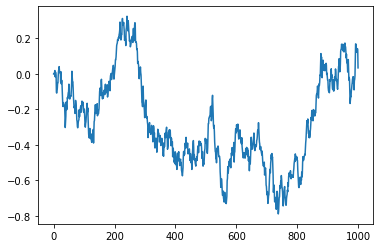

Значение S_n при данном n получилось: 1.0324113992417054


In [ ]:
property13check(30)

Задача 2.5. Для одной и той же траектории стандартного винеровского процесса 𝑤 вычис-лить приближенно ∫𝑤(𝜔,𝑢)𝑑𝑤(𝜔,𝑢)10 и ∫𝑤(𝜔,𝑢)∘𝑑𝑤(𝜔,𝑢)10 (шаг разбиения h = 0,000001). Сравнить первую аппроксимацию со значением 𝑤2(𝜔,1)−12, а вторую аппроксима-цию – с 𝑤2(𝜔,1)2.

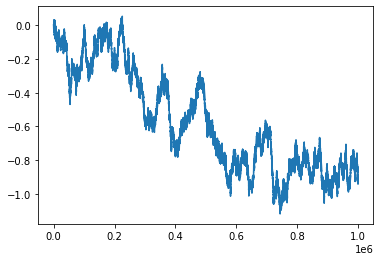

In [ ]:
w = w_processB(10**6, 1, 10**(-6))
plt.plot(w[0])
plt.show()

In [ ]:
S_1 = sum([w[0][i-1]*(w[0][i]-w[0][i-1]) for i in range(1, len(w[0]))])
S_2 = sum([((w[0][i-1]+w[0][i])/2)*(w[0][i]-w[0][i-1]) for i in range(1, len(w[0]))])

Первый интеграл приближенно

In [ ]:
S_1

-0.05817202256285053

Второй интеграл приближенно

In [ ]:
S_2

0.4416301876472447

In [ ]:
print('первая аппроксимация: ', (w[0][-1]*w[0][-1]-1)/2)
print('вторая аппроксимация: ', (w[0][-1]*w[0][-1])/2)

первая аппроксимация:  -0.0583698123527403
вторая аппроксимация:  0.4416301876472597
